# Analysis Vector in Factorization Machine
----

### 1. Train FM model


In [17]:
# -*- coding: utf-8 -*-
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Dataset : Titanic Dataset
from FM import FactorizationMachine
fm = FactorizationMachine(k=4,
                          lr=0.005,
                          l2_reg=True,
                          l2_lambda=0.0001,
                          epoch=200,
                          early_stop_window=3,
                          train_data='../dataset/train.txt',
                          valid_data='../dataset/test.txt')
fm.train()

Start to init FM vectors.
Finish init FM vectors.
epoch: 1 || train_loss: 1804.1051052521334 || valid_loss: 457.5450381978844 || Train AUC: 0.45259619020608804 || Test AUC: 0.47206147424343037
epoch: 2 || train_loss: 668.2102310271476 || valid_loss: 168.18904448681212 || Train AUC: 0.7339820854603893 || Test AUC: 0.7208044777535338
epoch: 3 || train_loss: 546.5581486031728 || valid_loss: 139.90800082622167 || Train AUC: 0.7794774532047647 || Test AUC: 0.7712740726686274
epoch: 4 || train_loss: 491.69883379501306 || valid_loss: 128.61092370304888 || Train AUC: 0.7959030535072792 || Test AUC: 0.7940423109761883
epoch: 5 || train_loss: 458.61869703838437 || valid_loss: 122.01367771104306 || Train AUC: 0.809055350727926 || Test AUC: 0.8013471207665306
epoch: 6 || train_loss: 436.5948955594991 || valid_loss: 117.72227046763815 || Train AUC: 0.8211086689355265 || Test AUC: 0.8077981216203396
epoch: 7 || train_loss: 421.1556019440605 || valid_loss: 114.83105997357883 || Train AUC: 0.828547456

0

### 2. Vector index mapping to named-featue

In [6]:
print(fm.v)
print(fm.w)

[[ 1.10050251 -0.38239444  0.91067812  0.55331615]
 [ 0.00573129 -0.48027542  0.32697313 -0.6778266 ]
 [ 0.60342298 -0.69912154  1.02728541 -1.12951835]
 [-0.37942832 -0.34053592 -0.52513848  1.52301207]
 [-0.0417112   0.1111625   0.09052609  0.13953872]
 [-0.1253578  -0.39465638 -1.21507345  1.32418379]
 [-0.79547968  0.23844118 -0.97518877  0.6853466 ]
 [-0.49875238  0.56337998 -0.6571298   0.8041756 ]
 [-0.02042607 -0.63565406 -2.23282737  1.04346589]
 [-0.44202232 -0.497357   -1.83849239  0.32268909]
 [-1.40642683  1.60721955  0.16508047  0.46968406]
 [ 0.42757877  0.24315178 -0.54023731 -0.70519662]
 [-0.07196376 -1.72853498  1.82622318 -1.01385855]
 [-0.23332159 -0.25820252  0.06161768  0.27818936]
 [ 0.25080309 -0.19751464  0.49527935  0.28954427]
 [-0.8641436  -1.53553175 -0.83309021 -0.54710871]
 [ 0.45263018  1.2335235  -1.00211105  1.13060814]
 [-0.3265323  -1.68313979  0.31342726 -0.81314439]
 [-1.31731601 -0.72410214 -0.65780761  0.1214698 ]
 [-0.40954254 -0.57156196 -0.20

In [8]:
print(len(fm.w))

37


In [28]:
# sum of dict's value : 37
col_len_dict = {'pclass': 3, 'sex': 1, 'age': 9, 'sibsp': 7, 'parch': 7, 'fare': 10}

# calculate start index of each feature
col_accum_index_dict = {}
cumulative = 0
for key, value in col_len_dict.items():
    col_accum_index_dict[key] = cumulative
    cumulative = cumulative + value
col_accum_index_dict

# get feature list
feature_list = []
for k, v in col_len_dict.items():
    for v in range(0, v):
        feature_list.append(k + " " + str(v))

### W vector : feature importance
- analysis of positive, negative effect by showing x feature's coefs

[Text(0, 0, 'pclass 0'),
 Text(0, 0, 'pclass 1'),
 Text(0, 0, 'pclass 2'),
 Text(0, 0, 'sex 0'),
 Text(0, 0, 'age 0'),
 Text(0, 0, 'age 1'),
 Text(0, 0, 'age 2'),
 Text(0, 0, 'age 3'),
 Text(0, 0, 'age 4'),
 Text(0, 0, 'age 5'),
 Text(0, 0, 'age 6'),
 Text(0, 0, 'age 7'),
 Text(0, 0, 'age 8'),
 Text(0, 0, 'sibsp 0'),
 Text(0, 0, 'sibsp 1'),
 Text(0, 0, 'sibsp 2'),
 Text(0, 0, 'sibsp 3'),
 Text(0, 0, 'sibsp 4'),
 Text(0, 0, 'sibsp 5'),
 Text(0, 0, 'sibsp 6'),
 Text(0, 0, 'parch 0'),
 Text(0, 0, 'parch 1'),
 Text(0, 0, 'parch 2'),
 Text(0, 0, 'parch 3'),
 Text(0, 0, 'parch 4'),
 Text(0, 0, 'parch 5'),
 Text(0, 0, 'parch 6'),
 Text(0, 0, 'fare 0'),
 Text(0, 0, 'fare 1'),
 Text(0, 0, 'fare 2'),
 Text(0, 0, 'fare 3'),
 Text(0, 0, 'fare 4'),
 Text(0, 0, 'fare 5'),
 Text(0, 0, 'fare 6'),
 Text(0, 0, 'fare 7'),
 Text(0, 0, 'fare 8'),
 Text(0, 0, 'fare 9')]

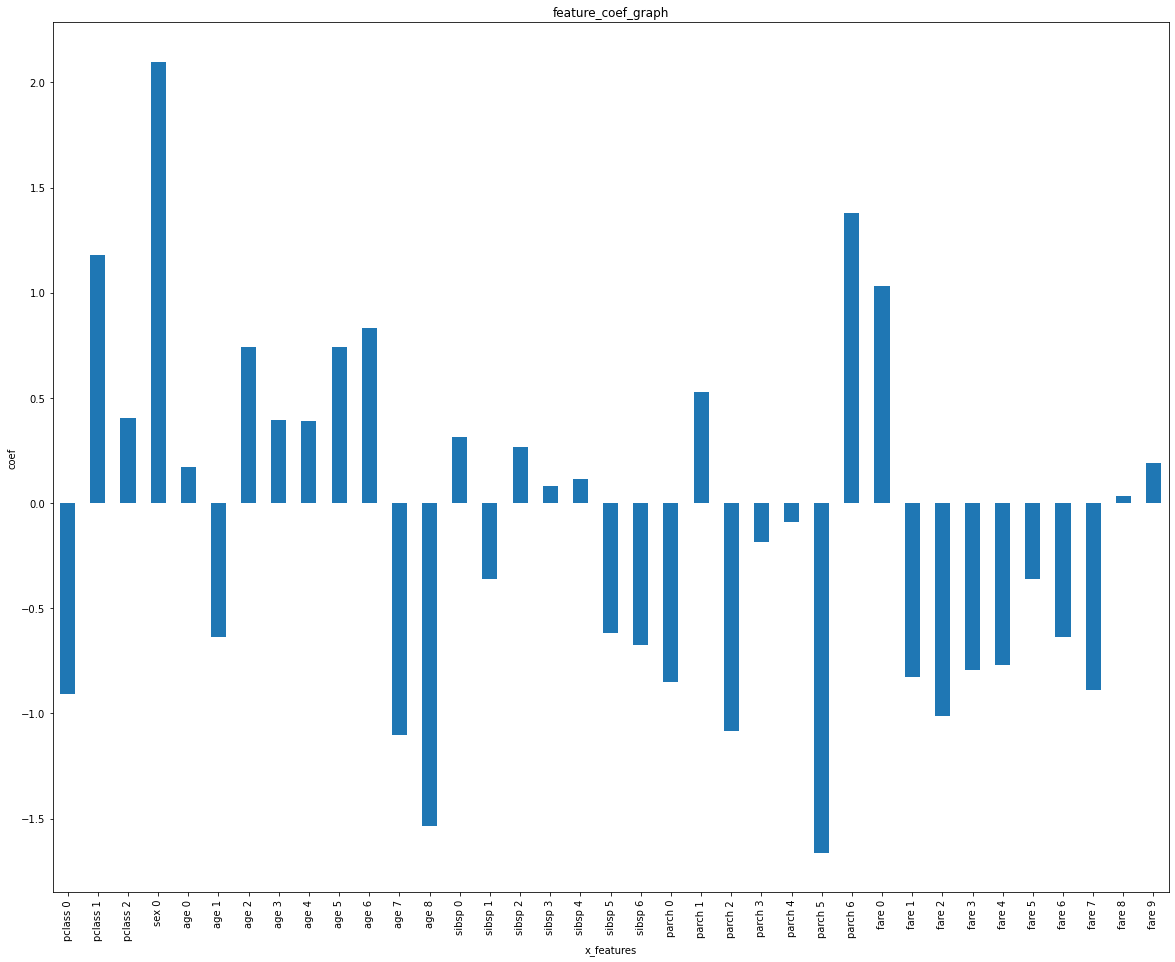

In [29]:
plt.rcParams['figure.figsize'] = [20, 16]
coefs = fm.w.tolist()
coefs_series = pd.Series(coefs)
x_labels = feature_list

ax = coefs_series.plot(kind='bar')
ax.set_title('feature_coef_graph')
ax.set_xlabel('x_features')
ax.set_ylabel('coef')
ax.set_xticklabels(x_labels)

- analysis of abs effect each feature
    - step 1: convert w values to absolute
    - step 2: group by feature (pclass, sex, age...) and calculate sum of coefs
    - step 3: show each groups coefs

In [43]:
abs_feature_list = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']

In [44]:
np.abs(fm.w)

array([0.90593809, 1.18106246, 0.40183312, 2.09711372, 0.17212046,
       0.63844896, 0.7403705 , 0.39456628, 0.39100924, 0.74322098,
       0.83328596, 1.10074391, 1.53721934, 0.31602061, 0.36163976,
       0.26579047, 0.07857317, 0.11642851, 0.61852649, 0.67404195,
       0.85055913, 0.52628725, 1.08181345, 0.18511678, 0.09051748,
       1.66207749, 1.37875589, 1.03225838, 0.82489014, 1.01282694,
       0.79189622, 0.77246953, 0.36191664, 0.63755959, 0.89031174,
       0.03409891, 0.19016425])

In [49]:
abs_feature_value_list = []
for start_index, length in zip([*col_accum_index_dict.values()], [*col_len_dict.values()]):
    abs_feature_value_list.append(np.sum(np.abs(fm.w)[start_index:start_index+length]))

[Text(0, 0, 'pclass'),
 Text(0, 0, 'sex'),
 Text(0, 0, 'age'),
 Text(0, 0, 'sibsp'),
 Text(0, 0, 'parch'),
 Text(0, 0, 'fare')]

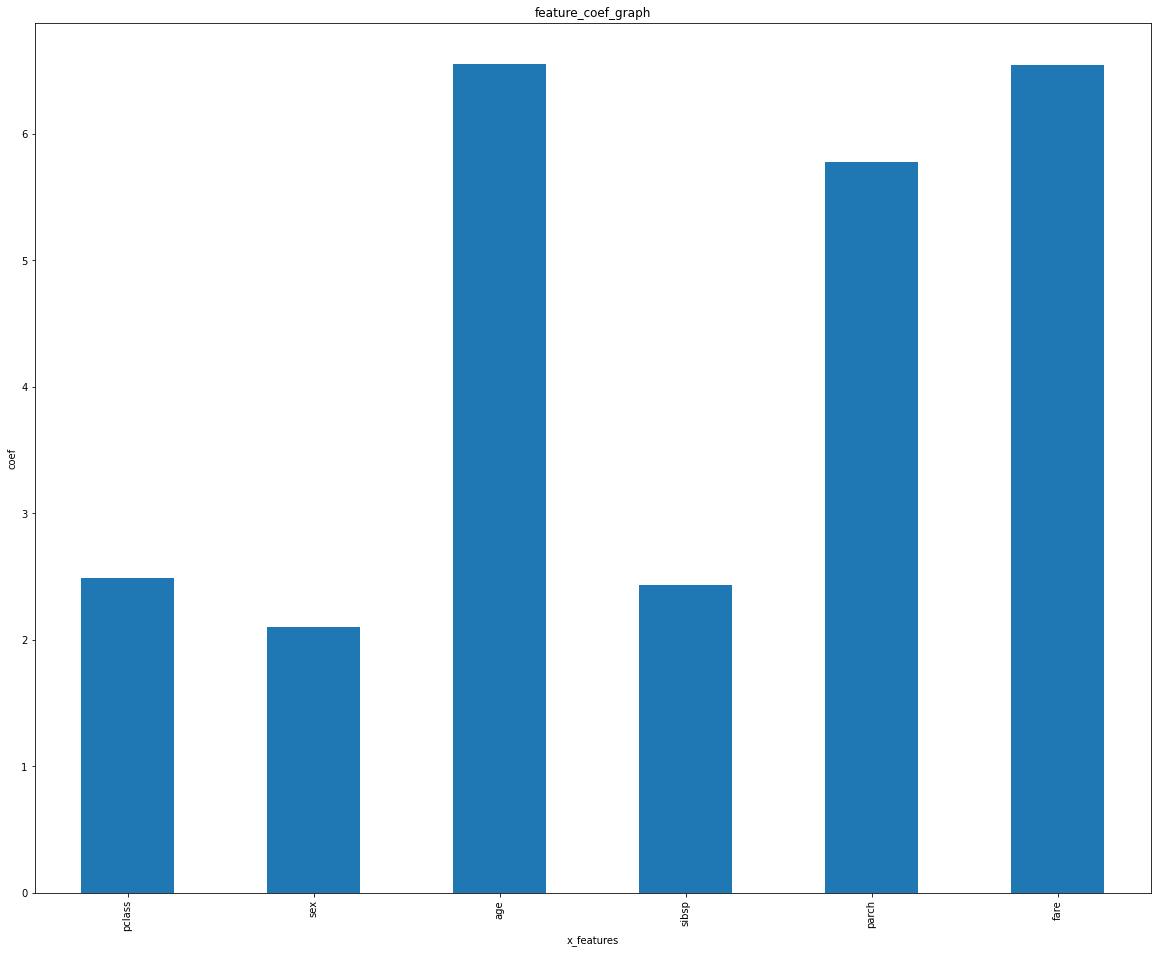

In [51]:
plt.rcParams['figure.figsize'] = [20, 16]
coefs = abs_feature_value_list
coefs_series = pd.Series(coefs)
x_labels = abs_feature_list

ax = coefs_series.plot(kind='bar')
ax.set_title('feature_coef_graph')
ax.set_xlabel('x_features')
ax.set_ylabel('coef')
ax.set_xticklabels(x_labels)

### V vector : feature complexity
- positive, negative effect by feature factorizing (= role as independent pair-wise latent vector. usually using for cold-start)

[Text(0, 0, 'pclass 0'),
 Text(0, 0, 'pclass 1'),
 Text(0, 0, 'pclass 2'),
 Text(0, 0, 'sex 0'),
 Text(0, 0, 'age 0'),
 Text(0, 0, 'age 1'),
 Text(0, 0, 'age 2'),
 Text(0, 0, 'age 3'),
 Text(0, 0, 'age 4'),
 Text(0, 0, 'age 5'),
 Text(0, 0, 'age 6'),
 Text(0, 0, 'age 7'),
 Text(0, 0, 'age 8'),
 Text(0, 0, 'sibsp 0'),
 Text(0, 0, 'sibsp 1'),
 Text(0, 0, 'sibsp 2'),
 Text(0, 0, 'sibsp 3'),
 Text(0, 0, 'sibsp 4'),
 Text(0, 0, 'sibsp 5'),
 Text(0, 0, 'sibsp 6'),
 Text(0, 0, 'parch 0'),
 Text(0, 0, 'parch 1'),
 Text(0, 0, 'parch 2'),
 Text(0, 0, 'parch 3'),
 Text(0, 0, 'parch 4'),
 Text(0, 0, 'parch 5'),
 Text(0, 0, 'parch 6'),
 Text(0, 0, 'fare 0'),
 Text(0, 0, 'fare 1'),
 Text(0, 0, 'fare 2'),
 Text(0, 0, 'fare 3'),
 Text(0, 0, 'fare 4'),
 Text(0, 0, 'fare 5'),
 Text(0, 0, 'fare 6'),
 Text(0, 0, 'fare 7'),
 Text(0, 0, 'fare 8'),
 Text(0, 0, 'fare 9')]

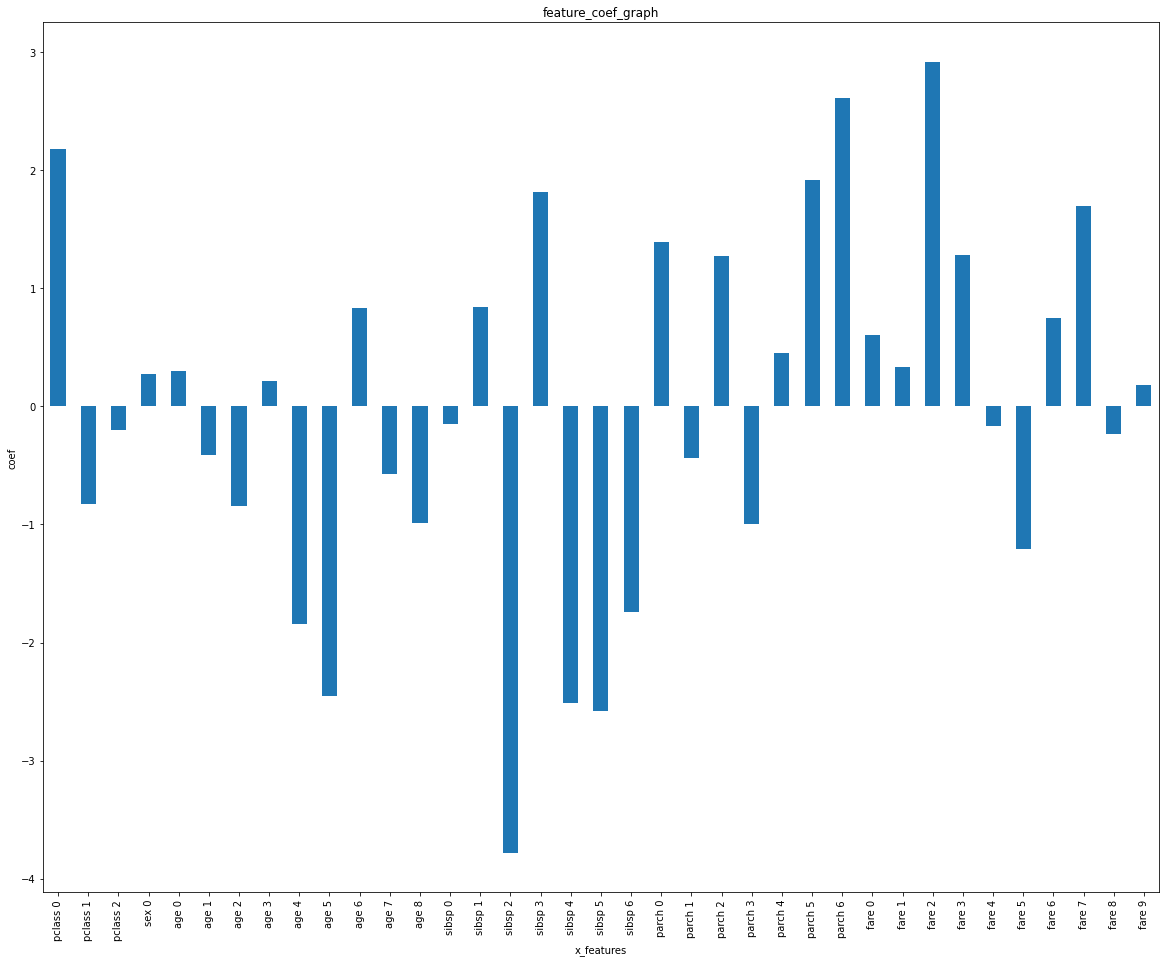

In [35]:
plt.rcParams['figure.figsize'] = [20, 16]
coefs = np.sum(fm.v, axis=1).tolist()
coefs_series = pd.Series(coefs)
x_labels = feature_list

ax = coefs_series.plot(kind='bar')
ax.set_title('feature_coef_graph')
ax.set_xlabel('x_features')
ax.set_ylabel('coef')
ax.set_xticklabels(x_labels)

- analysis of feature complexity (affect to train other feature and result of model's equation)
    - step 1: convert v values to absolute
    - step 2: group by feature (pclass, sex, age...) and calculate sum of coefs
    - step 3: show each groups coefs

In [55]:
np.sum(np.abs(fm.v), axis=1)

array([2.94689122, 1.49080643, 3.45934827, 2.76811479, 0.3829385 ,
       3.05927143, 2.69445624, 2.52343776, 3.93237339, 3.10056079,
       3.64841091, 1.91616448, 4.64058048, 0.83133115, 1.23314135,
       3.77987428, 3.81887287, 3.13624374, 2.82069555, 1.7440165 ,
       3.8964855 , 0.62338047, 2.47471366, 2.70774342, 2.60137817,
       3.35616252, 3.71643884, 1.21276179, 1.825664  , 2.91841567,
       1.71076002, 3.03645077, 1.20604007, 2.89617028, 1.69659834,
       3.36756093, 1.30938011])

In [56]:
abs_feature_value_list = []
for start_index, length in zip([*col_accum_index_dict.values()], [*col_len_dict.values()]):
    abs_feature_value_list.append(np.sum(np.sum(np.abs(fm.v), axis=1)[start_index:start_index+length]))

[Text(0, 0, 'pclass'),
 Text(0, 0, 'sex'),
 Text(0, 0, 'age'),
 Text(0, 0, 'sibsp'),
 Text(0, 0, 'parch'),
 Text(0, 0, 'fare')]

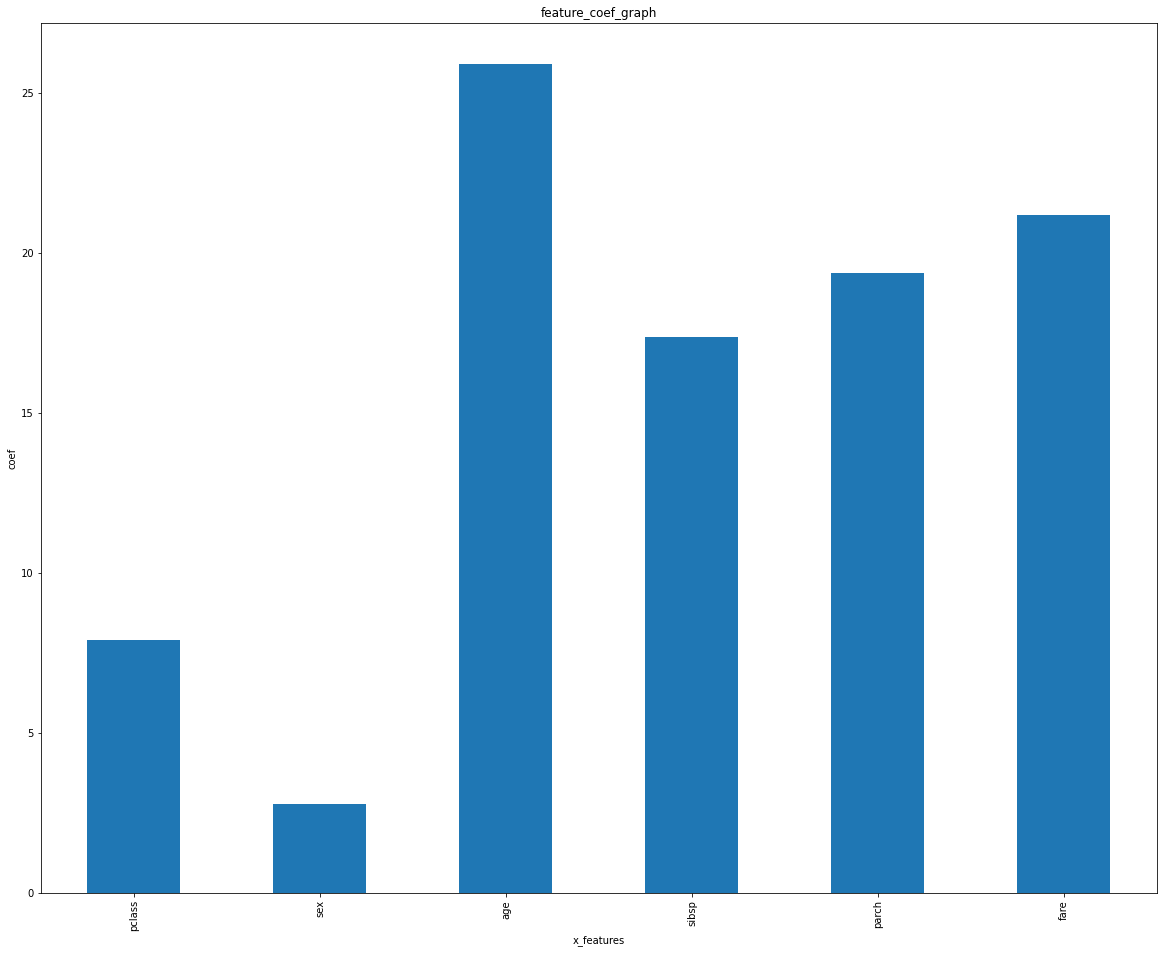

In [57]:
plt.rcParams['figure.figsize'] = [20, 16]
coefs = abs_feature_value_list
coefs_series = pd.Series(coefs)
x_labels = abs_feature_list

ax = coefs_series.plot(kind='bar')
ax.set_title('feature_coef_graph')
ax.set_xlabel('x_features')
ax.set_ylabel('coef')
ax.set_xticklabels(x_labels)